Lehcene Mohamed Lemine => SDIA ML

In [1]:
#STUP 1 => Importer Librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

In [2]:
#Stup 2 => Telecharger Data Set occupancy
dataset = pd.read_csv("C:/Users/HP/Desktop/ExamenMLSDIA/Data/occupancy.csv")
dataset.head(5)
#date CO2

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [ ]:
dataset.info() 

In [3]:
#Setup  3 => Cleaning Data
df = dataset.drop(["date","CO2"],axis=1)
df.head()

,Temperature,Humidity,Light,HumidityRatio,Occupancy
140,23.7000,26.272,585.200000,0.004764,1
141,23.7180,26.290,578.400000,0.004773,1
142,23.7300,26.230,572.666667,0.004765,1
143,23.7225,26.125,493.750000,0.004744,1
144,23.7540,26.200,488.600000,0.004767,1


In [4]:
#Setup 4 => Normalize Features
df.iloc[:,0:4] = (df-df.mean())/(df.std())
df.head()

,Temperature,Humidity,Light,HumidityRatio,Occupancy
140,2.204349,0.376743,1.566568,1.207314,1
141,2.221858,0.384130,1.539391,1.221232,1
142,2.233531,0.359508,1.516477,1.208934,1
143,2.226235,0.316419,1.201077,1.173919,1
144,2.256877,0.347197,1.180494,1.211295,1


In [5]:
#Stup  5 => Separer Features => X and Target => y
X = df[['Temperature','Humidity','Light', 'HumidityRatio']].values
y = df[['Occupancy']].values

In [6]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [8]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

In [9]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [10]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [11]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [12]:
def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5

In [13]:
def regression_logistique(X, y, learning_rate=0.01, n_iter=1000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

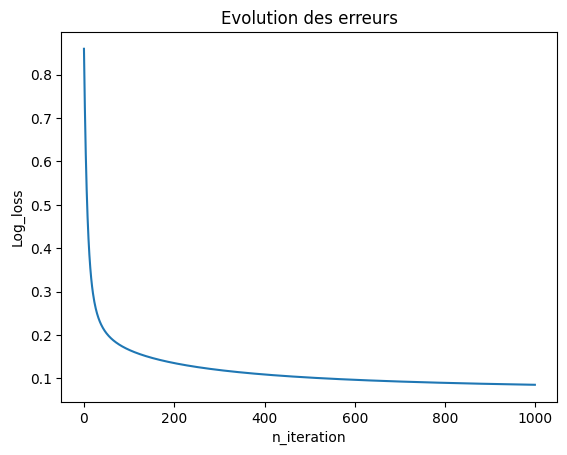

In [14]:
W,b=regression_logistique(X, y)

In [17]:
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix
y_pred = predict(X, W, b)
cm = confusion_matrix(y, y_pred)

[[0.99091245]
 [0.99007069]
 [0.98914892]
 ...
 [0.99963643]
 [0.99961682]
 [0.99952897]]


In [18]:
print(y_pred)

[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]


In [19]:
y_pred2 = predict(np.array([100,2567,333,422]), W, b)
print(y_pred2)

[1.]
[ True]


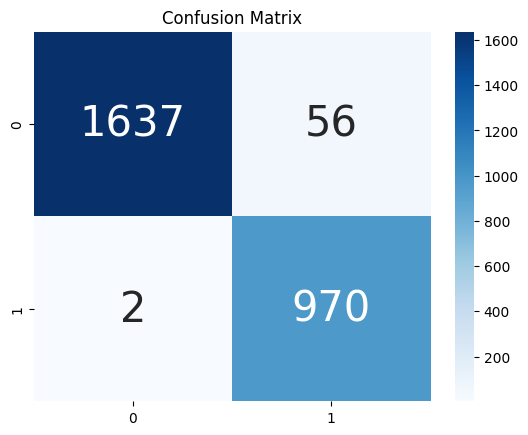

In [20]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()